In [175]:
import pandas as pd
from xgboost import XGBRegressor
from utils import process_df
import os
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [34]:
data_dir = "ipl_csv2"

In [35]:
file_list = os.listdir(data_dir)

In [36]:
file_list = [x for x in file_list if 'info' not in x and 'csv' in x]
file_list.remove('all_matches.csv')

In [37]:
# file_list

['598068.csv',
 '1304076.csv',
 '598040.csv',
 '598054.csv',
 '1304062.csv',
 '1216499.csv',
 '1304089.csv',
 '829799.csv',
 '1312199.csv',
 '335990.csv',
 '335984.csv',
 '548329.csv',
 '548315.csv',
 '1082650.csv',
 '1082644.csv',
 '501259.csv',
 '1216512.csv',
 '501265.csv',
 '1304102.csv',
 '1304116.csv',
 '501271.csv',
 '1216506.csv',
 '981007.csv',
 '829821.csv',
 '981013.csv',
 '1254084.csv',
 '829809.csv',
 '1254090.csv',
 '1254091.csv',
 '1254085.csv',
 '1216507.csv',
 '501270.csv',
 '501264.csv',
 '1216513.csv',
 '1304103.csv',
 '501258.csv',
 '1082645.csv',
 '548314.csv',
 '548328.csv',
 '335985.csv',
 '335991.csv',
 '980907.csv',
 '980913.csv',
 '1312198.csv',
 '1216498.csv',
 '1304088.csv',
 '829767.csv',
 '1304063.csv',
 '598055.csv',
 '598041.csv',
 '1304077.csv',
 '829773.csv',
 '598069.csv',
 '829759.csv',
 '1304049.csv',
 '598057.csv',
 '1304061.csv',
 '829765.csv',
 '829771.csv',
 '1304075.csv',
 '598043.csv',
 '336040.csv',
 '980905.csv',
 '980911.csv',
 '980939.csv'

In [38]:
df_list = []

In [39]:
len(file_list)

1024

In [40]:
for matches in tqdm(file_list):
    # print(matches)
    df_list.append(process_df(pd.read_csv(os.path.join(data_dir,matches))))

  0%|          | 0/1024 [00:00<?, ?it/s]

In [41]:
df_list[-1].columns

Index(['match_id', 'season', 'venue', 'innings', 'ball', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'wicket', 'wickets_left',
       'total_runs', 'runs_left'],
      dtype='object')

In [42]:
train_cols = ['innings', 'ball','wickets_left','runs_left']

In [43]:
target_cols = 'runs_off_bat'

In [44]:
seasons = list(set([df.season.unique()[0] for df in df_list]))

In [45]:
seasons

[2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [46]:
train = []
test = []


In [47]:
for df in df_list:
    if df.season.unique()[0] > 2021:
        test.append(df)
    else:
        train.append(df)

In [48]:
len(train),len(test),len(df_list)

(876, 148, 1024)

### Train test split (alternative splits)

In [83]:
train,test = train_test_split(df_list,random_state=42)

In [84]:
len(train),len(test),len(df_list)

(1536, 512, 2048)

### Creating train and test dataframes from split

In [49]:
train_data = pd.concat(train)

In [50]:
train_data

,match_id,season,venue,innings,ball,striker,non_striker,bowler,runs_off_bat,extras,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,wickets_left,total_runs,runs_left
0,598068,2013,M Chinnaswamy Stadium,1,0.1,V Kohli,CH Gayle,R Ashwin,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,106
1,598068,2013,M Chinnaswamy Stadium,1,0.2,V Kohli,CH Gayle,R Ashwin,4,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,4,102
2,598068,2013,M Chinnaswamy Stadium,1,0.3,V Kohli,CH Gayle,R Ashwin,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,102
3,598068,2013,M Chinnaswamy Stadium,1,0.4,V Kohli,CH Gayle,R Ashwin,1,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,1,101
4,598068,2013,M Chinnaswamy Stadium,1,0.5,CH Gayle,V Kohli,R Ashwin,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,598065,2013,"Rajiv Gandhi International Stadium, Uppal",2,19.2,KK Cooper,PV Tambe,DW Steyn,4,0,...,0.0,0.0,0,NaN,NaN,NaN,0,2,4,29
241,598065,2013,"Rajiv Gandhi International Stadium, Uppal",2,19.3,KK Cooper,PV Tambe,DW Steyn,4,0,...,0.0,0.0,0,NaN,NaN,NaN,0,2,4,25
242,598065,2013,"Rajiv Gandhi International Stadium, Uppal",2,19.4,KK Cooper,PV Tambe,DW Steyn,0,0,...,0.0,0.0,caught,KK Cooper,NaN,NaN,1,2,0,25
243,598065,2013,"Rajiv Gandhi International Stadium, Uppal",2,19.5,PV Tambe,SK Trivedi,DW Steyn,1,0,...,0.0,0.0,0,NaN,NaN,NaN,0,1,1,24


In [51]:
test_data = pd.concat(test)

In [52]:
test_data

,match_id,season,venue,innings,ball,striker,non_striker,bowler,runs_off_bat,extras,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,wickets_left,total_runs,runs_left
0,1304076,2022,"Brabourne Stadium, Mumbai",1,0.1,JC Buttler,D Padikkal,UT Yadav,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,217
1,1304076,2022,"Brabourne Stadium, Mumbai",1,0.2,JC Buttler,D Padikkal,UT Yadav,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,217
2,1304076,2022,"Brabourne Stadium, Mumbai",1,0.3,JC Buttler,D Padikkal,UT Yadav,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,217
3,1304076,2022,"Brabourne Stadium, Mumbai",1,0.4,JC Buttler,D Padikkal,UT Yadav,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,217
5,1304076,2022,"Brabourne Stadium, Mumbai",1,0.6,D Padikkal,JC Buttler,UT Yadav,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,10,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1304053,2022,"Brabourne Stadium, Mumbai",2,18.7,E Lewis,A Badoni,S Dube,4,0,...,0.0,0.0,0,NaN,NaN,NaN,0,6,4,15
246,1304053,2022,"Brabourne Stadium, Mumbai",2,18.8,E Lewis,A Badoni,S Dube,6,0,...,0.0,0.0,0,NaN,NaN,NaN,0,6,6,9
249,1304053,2022,"Brabourne Stadium, Mumbai",2,19.3,A Badoni,E Lewis,Mukesh Choudhary,6,0,...,0.0,0.0,0,NaN,NaN,NaN,0,6,6,1
250,1304053,2022,"Brabourne Stadium, Mumbai",2,19.4,A Badoni,E Lewis,Mukesh Choudhary,0,0,...,0.0,0.0,0,NaN,NaN,NaN,0,6,0,1


In [53]:
train_X,test_X = train_data[train_cols],test_data[train_cols]
train_Y,test_Y = train_data[target_cols],test_data[target_cols]


### Baseline

In [55]:
train_X.loc[:,'over'] = train_X['ball']//1

In [57]:
test_X.loc[:,'over'] = test_X['ball']//1

In [58]:
train_X

,innings,ball,runs_off_bat,wickets_left,runs_left,over
0,1,0.1,0,10,106,0.0
1,1,0.2,4,10,102,0.0
2,1,0.3,0,10,102,0.0
3,1,0.4,1,10,101,0.0
4,1,0.5,0,10,101,0.0
...,...,...,...,...,...,...
240,2,19.2,4,2,29,19.0
241,2,19.3,4,2,25,19.0
242,2,19.4,0,2,25,19.0
243,2,19.5,1,1,24,19.0


In [59]:
run_means = train_X.groupby(['innings','over'])['runs_off_bat'].mean()

In [60]:
baseline_preds = [run_means[inn][over] for inn,over in tqdm(zip(test_X.innings,test_X.over))]

0it [00:00, ?it/s]

In [61]:
## RMSE of baseline

mean_squared_error(test_Y,baseline_preds,squared=False)

1.7181079841415565

### XGBoost

In [62]:
xgb_model = XGBRegressor()

In [63]:
xgb_model.fit(train_X[train_cols],train_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
#RMSE
mean_squared_error(test_Y,xgb_model.predict(test_X[train_cols]),squared=False)

2.688769460850184e-06

### Linear Regression Model

In [176]:
lin_model = LinearRegression()

In [177]:
lin_model.fit(train_X[train_cols],train_Y)

LinearRegression()

In [178]:
#RMSE
mean_squared_error(test_Y,lin_model.predict(test_X[train_cols]),squared=False)

1.6432264232742364e-13

### Inference

In [68]:
import matplotlib.pyplot as plt

(array([1.2732e+04, 1.2995e+04, 0.0000e+00, 2.1060e+03, 1.0300e+02,
        0.0000e+00, 4.1710e+03, 0.0000e+00, 1.0000e+00, 2.1670e+03]),
 array([2.66207849e-06, 6.00001693e-01, 1.20000064e+00, 1.79999971e+00,
        2.39999866e+00, 2.99999785e+00, 3.59999681e+00, 4.19999599e+00,
        4.79999495e+00, 5.39999390e+00, 5.99999285e+00]),
 <BarContainer object of 10 artists>)

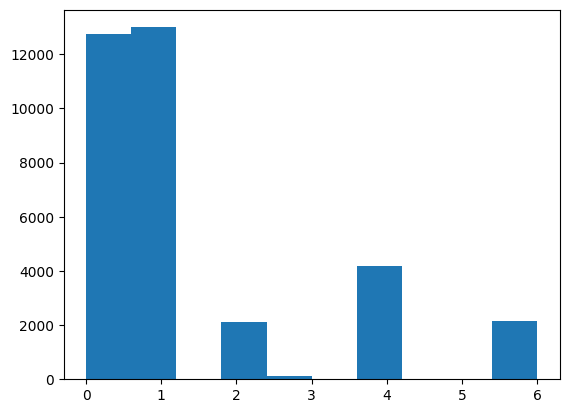

In [69]:
plt.hist(xgb_model.predict(test_X[train_cols]))

(array([7.6727e+04, 7.7262e+04, 0.0000e+00, 1.3245e+04, 0.0000e+00,
        6.5000e+02, 2.3381e+04, 0.0000e+00, 6.1000e+01, 9.5460e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

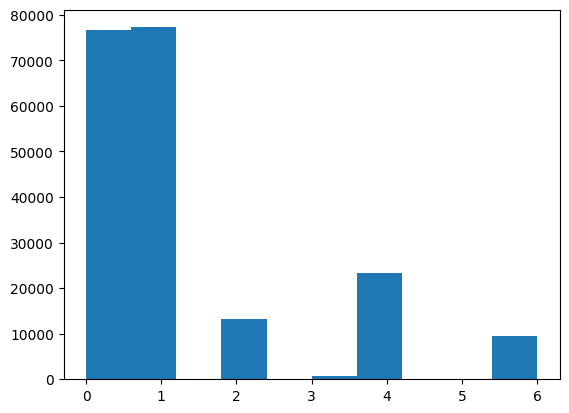

In [71]:
plt.hist(train_X['runs_off_bat'])

In [193]:
year = 2023

In [194]:
best_model = lin_model

In [195]:
pred = best_model.predict(test_data.query("season == @year")[train_cols])

In [196]:
inf_df = test_data.query("season == @year").copy()

In [197]:
inf_df['xR'] = pred

In [198]:
inf_df

,match_id,season,venue,innings,ball,striker,non_striker,bowler,runs_off_bat,extras,...,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,wickets_left,total_runs,runs_left,xR
0,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,WP Saha,Shubman Gill,DL Chahar,0,0,...,0.0,0,NaN,NaN,NaN,0,10,0,214,1.054166e-13
1,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,WP Saha,Shubman Gill,DL Chahar,0,0,...,0.0,0,NaN,NaN,NaN,0,10,0,214,1.056441e-13
2,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,WP Saha,Shubman Gill,DL Chahar,1,0,...,0.0,0,NaN,NaN,NaN,0,10,1,213,1.000000e+00
3,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,Shubman Gill,WP Saha,DL Chahar,1,0,...,0.0,0,NaN,NaN,NaN,0,10,1,212,1.000000e+00
4,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,WP Saha,Shubman Gill,DL Chahar,1,0,...,0.0,0,NaN,NaN,NaN,0,10,1,211,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.4,Shubman Gill,R Tewatia,HV Patel,1,0,...,0.0,0,NaN,NaN,NaN,0,6,1,10,1.000000e+00
242,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.5,R Tewatia,Shubman Gill,HV Patel,2,0,...,0.0,0,NaN,NaN,NaN,0,6,2,8,2.000000e+00
243,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.6,R Tewatia,Shubman Gill,HV Patel,0,0,...,0.0,0,NaN,NaN,NaN,0,6,0,8,1.389587e-13
244,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.7,R Tewatia,Shubman Gill,HV Patel,0,0,...,0.0,0,NaN,NaN,NaN,0,6,0,8,1.391863e-13


In [199]:
inf_df['batsman_imp'] = inf_df['runs_off_bat'] - inf_df['xR']

In [200]:
inf_df['bowler_imp'] = -inf_df['batsman_imp']

In [201]:
inf_cols = ['match_id', 'season', 'venue', 'innings', 'ball',
       'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'wicket_type', 'player_dismissed','xR','batsman_imp','bowler_imp']

In [202]:
inf_df[inf_cols]

,match_id,season,venue,innings,ball,striker,non_striker,bowler,runs_off_bat,wicket_type,player_dismissed,xR,batsman_imp,bowler_imp
0,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,WP Saha,Shubman Gill,DL Chahar,0,0,NaN,1.054166e-13,-1.054166e-13,1.054166e-13
1,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,WP Saha,Shubman Gill,DL Chahar,0,0,NaN,1.056441e-13,-1.056441e-13,1.056441e-13
2,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,WP Saha,Shubman Gill,DL Chahar,1,0,NaN,1.000000e+00,-1.043610e-14,1.043610e-14
3,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,Shubman Gill,WP Saha,DL Chahar,1,0,NaN,1.000000e+00,-1.065814e-14,1.065814e-14
4,1370353,2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,WP Saha,Shubman Gill,DL Chahar,1,0,NaN,1.000000e+00,-1.088019e-14,1.088019e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.4,Shubman Gill,R Tewatia,HV Patel,1,0,NaN,1.000000e+00,-4.329870e-14,4.329870e-14
242,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.5,R Tewatia,Shubman Gill,HV Patel,2,0,NaN,2.000000e+00,5.195844e-14,-5.195844e-14
243,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.6,R Tewatia,Shubman Gill,HV Patel,0,0,NaN,1.389587e-13,-1.389587e-13,1.389587e-13
244,1359544,2023,"M Chinnaswamy Stadium, Bengaluru",2,18.7,R Tewatia,Shubman Gill,HV Patel,0,0,NaN,1.391863e-13,-1.391863e-13,1.391863e-13


In [203]:
inf_df.groupby(['striker'])['batsman_imp'].sum().reset_index().sort_values('batsman_imp',ascending= False).head(20)

,striker,batsman_imp
154,Shubman Gill,1.815981e-11
143,SA Yadav,1.536586e-11
174,YBK Jaiswal,1.523059e-11
44,F du Plessis,1.391146e-11
47,GJ Maxwell,1.133674e-11
132,RD Gaikwad,1.086050e-11
48,H Klaasen,1.019267e-11
30,C Green,8.662695e-12
8,AM Rahane,8.596215e-12
42,DP Conway,7.750054e-12


In [204]:
inf_df.groupby(['bowler'])['bowler_imp'].sum().reset_index().sort_values('bowler_imp',ascending= False)

,bowler,bowler_imp
70,M Pathirana,5.793584e-12
83,Mohammed Siraj,3.574679e-12
63,Kuldeep Yadav,2.894305e-12
7,AR Patel,2.569654e-12
99,R Ashwin,2.415119e-12
...,...,...
16,Arshad Khan,-6.538891e-12
86,Mukesh Kumar,-6.892909e-12
17,Arshdeep Singh,-7.843830e-12
124,TU Deshpande,-9.773041e-12


In [205]:
inf_df.groupby(['bowler']).\
    agg(Mean = ('bowler_imp','mean'),Count = ('bowler_imp','count')).\
        reset_index().\
            query('Count >100').\
                sort_values('Mean',ascending = False).head(20)

,bowler,Mean,Count
70,M Pathirana,2.084023e-14,278
83,Mohammed Siraj,1.191560e-14,300
63,Kuldeep Yadav,9.844574e-15,294
7,AR Patel,9.112247e-15,282
99,R Ashwin,8.214691e-15,294
92,Naveen-ul-Haq,6.735900e-15,168
110,Ravi Bishnoi,6.024942e-15,303
94,Noor Ahmad,5.987114e-15,283
104,RA Jadeja,5.703079e-15,342
76,MM Ali,2.921428e-15,156


In [206]:
inf_df.groupby(['striker']).\
    agg(Mean = ('batsman_imp','mean'),Count = ('batsman_imp','count')).\
        reset_index().\
            query('Count >100').\
                sort_values('Mean',ascending = False).head(20)

,striker,Mean,Count
47,GJ Maxwell,5.200340e-14,218
143,SA Yadav,4.628270e-14,332
8,AM Rahane,4.548262e-14,189
48,H Klaasen,4.060825e-14,251
116,PD Salt,4.032228e-14,133
174,YBK Jaiswal,3.997529e-14,381
107,N Pooran,3.343115e-14,207
154,Shubman Gill,3.242823e-14,560
62,JJ Roy,3.211541e-14,187
30,C Green,3.104909e-14,279


- Get time series of batsmen, cluster their innings to labels, assign their label based on most frequent label;
- On the test set, get the innings of each batsman and aggregate their runs over balls faced
- similarly take the xR for the above balls
- compare the cumulative effects for all clusters
- optimal innings construction template